In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
iris = load_iris()
X = iris.data
y = iris.target


In [7]:
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['target'] = y
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [17]:
# inertia: 군집 내 거리제곱합의 합
ks = range(1,10)
inertias = []
for k in ks:
  model = KMeans(n_clusters=k, n_init='auto')
  model.fit(X)
  inertias.append(model.inertia_)

print(inertias)

[681.3706, 152.3479517603579, 78.851441426146, 71.75951450992495, 46.47223015873017, 39.620375014280896, 40.58616573053188, 39.246984669731745, 27.86291131237185]


In [18]:
inertias

[681.3706,
 152.3479517603579,
 78.851441426146,
 71.75951450992495,
 46.47223015873017,
 39.620375014280896,
 40.58616573053188,
 39.246984669731745,
 27.86291131237185]

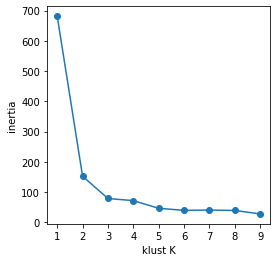

In [19]:
plt.figure(figsize=(4,4))
plt.plot(ks, inertias, '-o')
plt.xlabel('klust K')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [49]:
model = KMeans(n_clusters=3,
               n_init='auto',
               max_iter=1000,
               random_state=20,
               algorithm='lloyd',
               verbose=2)
model.fit(X)
centers = model.cluster_centers_  # 각 군집의 centroid(중심점)
y_pred = model.predict(X)
y_pred

Initialization complete
Iteration 0, inertia 90.72999999999999.
Iteration 1, inertia 80.0594266200554.
Iteration 2, inertia 79.57585726935406.
Iteration 3, inertia 78.99749895643234.
Iteration 4, inertia 78.85566582597731.
Converged at iteration 4: strict convergence.


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [21]:
clust_df = df.copy()

In [23]:
clust_df['clust']= y_pred
clust_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,clust
0,5.1,3.5,1.4,0.2,0,2
1,4.9,3.0,1.4,0.2,0,2
2,4.7,3.2,1.3,0.2,0,2
3,4.6,3.1,1.5,0.2,0,2
4,5.0,3.6,1.4,0.2,0,2
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1


In [24]:
silhouette_score(X, y_pred)

0.551191604619592

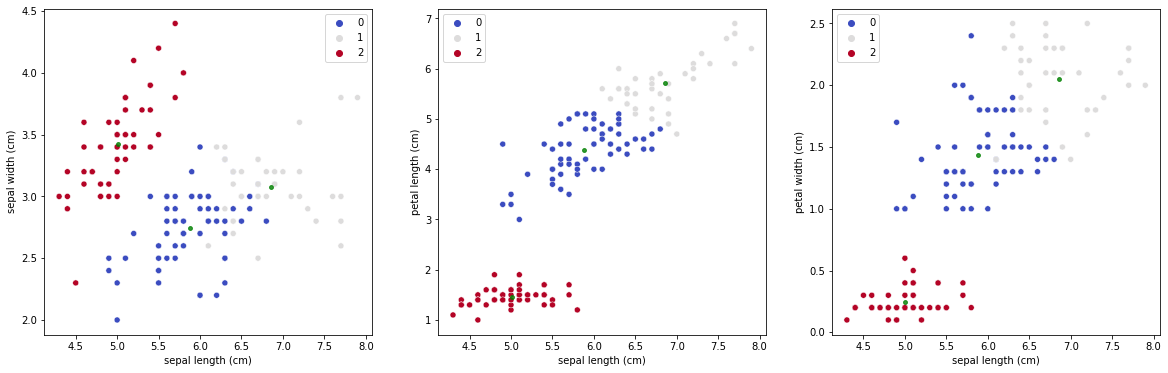

In [39]:
import seaborn as sns
plt.figure(figsize=(20, 6))
plt.subplot(131)
sns.scatterplot(x=clust_df.iloc[:,0],
                y=clust_df.iloc[:,1],
                data=clust_df, hue=model.labels_,
                palette='coolwarm')
plt.scatter(centers[:,0], centers[:,1], c='green',
            alpha=0.8, s=15)

plt.subplot(132)
sns.scatterplot(x=clust_df.iloc[:,0],
                y=clust_df.iloc[:,2],
                data=clust_df, hue=model.labels_,
                palette='coolwarm')
plt.scatter(centers[:,0], centers[:,2], c='green',
            alpha=0.8, s=15)

plt.subplot(133)
sns.scatterplot(x=clust_df.iloc[:,0],
                y=clust_df.iloc[:,3],
                data=clust_df, hue=model.labels_,
                palette='coolwarm')
plt.scatter(centers[:,0], centers[:,3], c='green',
            alpha=0.8, s=15)



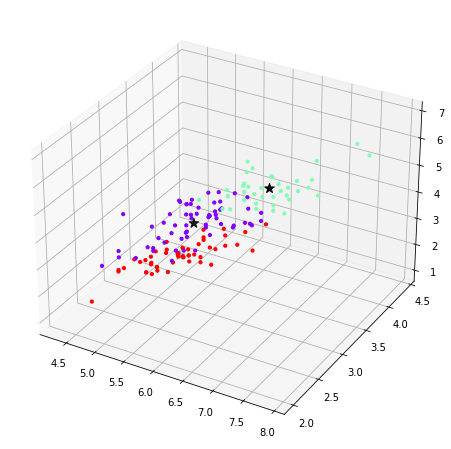

In [46]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(clust_df.iloc[:,0],
           clust_df.iloc[:,1],
           clust_df.iloc[:,2],
           c=clust_df.clust,
           s=10, cmap='rainbow', alpha=1)
#centroid
ax.scatter(centers[:,0], centers[:,1], centers[:,2],
           c='black', s=100, marker='*')
plt.show()
